In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D
import re
matplotlib.rc('text',usetex=True)
matplotlib.rcParams['font.family'] = 'sans'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['legend.fontsize'] = 10
matplotlib.rcParams['font.serif'] = ['Times New Roman']
matplotlib.rcParams['lines.linewidth'] = 1.5
matplotlib.rcParams['lines.markersize'] = 5
matplotlib.rcParams['lines.markeredgewidth'] = 2
matplotlib.rcParams['axes.linewidth'] = 1.5
matplotlib.rcParams['xtick.major.size'] = 5
matplotlib.rcParams['xtick.minor.size'] = 2
matplotlib.rcParams['ytick.major.size'] = 5
matplotlib.rcParams['ytick.minor.size'] = 2

In [2]:
#Load data

#RVS
water2_rvs_file = 'result-water2-rvs-aug-cc-pvtz.dat'
zn_h2o_rvs_file = 'result-zn-hoh-rvs-aug-cc-pvtz.dat'

rvs = {}
rvs['water2'] = pd.read_csv(water2_rvs_file,sep='\s+',header=0,comment='#')
rvs['zn_h2o'] = pd.read_csv(zn_h2o_rvs_file,sep='\s+',header=0,comment='#')

In [3]:
#CSOV (B3LYP)
water2_csov_file = 'result-water2-csov-aug-cc-pvtz.dat'
zn_h2o_csov_file = 'result-zn-hoh-csov-aug-cc-pvtz.dat'

csov = {}
csov['water2'] = pd.read_csv(water2_csov_file,sep='\s+',header=0,comment='#')
csov['zn_h2o'] = pd.read_csv(zn_h2o_csov_file,sep='\s+',header=0,comment='#')

In [4]:
csov['water2']

Ind     Ct    Pol
1.54 -11.335 -6.198 -5.137
1.74  -6.018 -3.386 -2.632
1.84  -4.456 -2.526 -1.930
1.94  -3.325 -1.905 -1.420
2.03  -2.568 -1.490 -1.078
2.14  -1.927 -1.135 -0.792
2.24  -1.496 -0.892 -0.604
2.34  -1.173 -0.704 -0.469
2.54  -0.737 -0.445 -0.292
3.04  -0.263 -0.149 -0.114
4.04  -0.048 -0.026 -0.022
5.04  -0.016 -0.010 -0.006

In [5]:
#ALMO (PBE0)

water2_almo_file = 'result-water2-almo-aug-cc-pvtz-pbe0.dat'
zn_h2o_almo_file = 'result-zn-hoh-almo-aug-cc-pvtz-pbe0.dat'

almo = {}
almo['water2'] = pd.read_csv(water2_almo_file,sep='\s+',header=0,comment='#')
almo['zn_h2o'] = pd.read_csv(zn_h2o_almo_file,sep='\s+',header=0,comment='#')

#attention No dATA for Zn...H2O at 3.O Ang with almo (not converged) --> use distance of the almo file

In [6]:
almo['zn_h2o']

d        FRZ        POL     RS-Ct1    SCF-Ct1      RS-TOT     SCF-TOT
0   1.5  41.199475 -86.902345  -7.742023  -8.146587  -53.444893  -53.849456
1   1.6   1.557838 -77.180562  -6.006331  -6.325673  -81.629057  -81.948399
2   1.7 -21.334423 -69.423250  -5.176260  -5.452620  -95.933933  -96.210294
3   1.8 -33.892753 -62.715653  -5.044508  -5.303099 -101.652914 -101.911502
4   1.9 -40.350970 -56.651093  -5.151308  -5.403981 -102.153370 -102.406044
5   2.0 -42.710648 -50.985624  -5.850978  -6.098355  -99.547250  -99.794627
6   2.1 -42.686275 -45.589666  -6.915357  -7.146915  -95.191298  -95.422856
7   2.2 -42.146383 -40.512778  -7.306603  -7.503415  -89.965761  -90.162573
8   2.3 -40.894793 -35.777681  -7.710255  -7.845476  -84.382729  -84.517950
9   2.4 -38.723387 -31.402657  -8.655870  -8.696448  -78.781914  -78.822492
10  2.5 -36.416616 -27.430530  -9.556154  -9.463353  -73.403300  -73.310497
11  2.6 -34.549747 -23.900289  -9.946762  -9.658437  -68.396798  -68.108473
12  2.7 -32.622793 -20.791717 -10.422135  -9.855308  -63.836647  -63.269818
13  2.8 -30.481171 -18.073197 -15.416186 -10.274467  -63.970554  -58.828834
14  2.9 -28.394933 -15.699449 -38.662411 -10.707551  -82.756790  -54.801930
15  2.9 -28.394933 -15.699449 -38.662411 -10.707551  -82.756790  -54.801930

In [7]:
#SAPTDFT(PBE0)||AC||NoS^2

water2_saptdft_pbe0_file = 'result-water2-saptdft-aug-cc-pvtz-pbe0.dat'
zn_h2o_saptdft_pbe0_file = 'result-zn-hoh-saptdft-aug-cc-pvtz-pbe0.dat'

saptdft_pbe0 = {}
saptdft_pbe0['water2'] = pd.read_csv(water2_saptdft_pbe0_file,sep='\s+',header=0,comment='#')
saptdft_pbe0['zn_h2o'] = pd.read_csv(zn_h2o_saptdft_pbe0_file,sep='\s+',header=0,comment='#')

In [8]:
saptdft_pbe0['water2']

kcal/mol      elst      exch      IND      dHF     DISP     Eint  \
0    water2_1 -19.04971  33.07735 -8.61498 -4.49728 -5.54540 -0.13274   
1    water2_2 -12.18824  16.61882 -4.42220 -2.11243 -3.63669 -3.62830   
2    water2_3  -9.88958  11.74580 -3.20069 -1.44474 -2.95943 -4.30391   
3    water2_4  -8.11432   8.28536 -2.33412 -0.98798 -2.41474 -4.57782   
4    water2_5  -6.82896   5.99187 -1.75586 -0.69589 -2.00545 -4.59841   
5    water2_6  -5.65660   4.09991 -1.27172 -0.46333 -1.61929 -4.44771   
6    water2_7  -4.80417   2.87711 -0.95067 -0.31809 -1.33028 -4.20802   
7    water2_8  -4.12488   2.01663 -0.71697 -0.21882 -1.09524 -3.92045   
8    water2_9  -3.13020   0.98770 -0.41892 -0.10429 -0.74703 -3.30845   
9   water2_10  -1.78125   0.16356 -0.12784 -0.01742 -0.29930 -2.04482   
10  water2_11  -0.77077   0.00433 -0.02086 -0.00077 -0.06109 -0.84838   
11  water2_12  -0.40582   0.00011 -0.00556 -0.00008 -0.01760 -0.42887   

         CT      POL  
0  -1.64289 -2.47481  
1  -0.71861 -1.59116  
2  -0.48210 -1.27385  
3  -0.32696 -1.01919  
4  -0.23071 -0.82925  
5  -0.15550 -0.65289  
6  -0.10830 -0.52428  
7  -0.07506 -0.42309  
8  -0.03481 -0.27982  
9  -0.00327 -0.10714  
10 -0.00098 -0.01911  
11 -0.00037 -0.00510

In [9]:
#SAPT2

water2_sapt2_file = 'Result-water2-sapt2-aug-cc-pvtz.dat'
zn_h2o_sapt2_file = 'Result-zn-hoh-sapt2-aug-cc-pvtz.dat'

sapt2 = {}
sapt2['water2'] = pd.read_csv(water2_sapt2_file,sep='\s+',header=0,comment='#')
sapt2['zn_h2o'] = pd.read_csv(zn_h2o_sapt2_file,sep='\s+',header=0,comment='#')

In [10]:
sapt2['water2']

Elec        Rep       Ind      Disp       Tot      Ct       dHF
1.54 -19.312220  32.933480 -9.375034 -5.179996 -0.933770 -2.2844 -3.903958
1.74 -12.447979  16.576999 -4.829964 -3.297800 -3.998745 -1.0834 -1.974848
1.84 -10.136453  11.729751 -3.503185 -2.649937 -4.559824 -0.7633 -1.380506
1.94  -8.327501   8.256908 -2.551875 -2.133601 -4.756069 -0.5452 -0.955769
2.03  -7.020210   5.968655 -1.919962 -1.753830 -4.725347 -0.4054 -0.679338
2.14  -5.824099   4.082264 -1.390235 -1.401083 -4.533153 -0.2902 -0.455553
2.24  -4.955725   2.868592 -1.040082 -1.142287 -4.269502 -0.2143 -0.314634
2.34  -4.254583   2.006989 -0.782521 -0.932701 -3.962817 -0.1583 -0.216672
2.54  -3.228769   0.982922 -0.455238 -0.629140 -3.330224 -0.0867 -0.103497
3.04  -1.835348   0.163655 -0.136695 -0.250236 -2.058624 -0.0194 -0.017284
4.04  -0.789736   0.004368 -0.021665 -0.052581 -0.859614 -0.0010 -0.000692
5.04  -0.413856   0.000110 -0.005735 -0.015555 -0.435036 -0.0000 -0.000070

In [11]:
#SAPT2+3

water2_sapt2p3_file = 'Result-water2-sapt2+3-aug-cc-pvtz.dat'
zn_h2o_sapt2p3_file = 'Result-zn-hoh-sapt2+3-aug-cc-pvtz.dat'

sapt2p3 = {}
sapt2p3['water2'] = pd.read_csv(water2_sapt2p3_file,sep='\s+',header=0,comment='#')
sapt2p3['zn_h2o'] = pd.read_csv(zn_h2o_sapt2p3_file,sep='\s+',header=0,comment='#')

In [12]:
#CCSD(T)

water2_cc_file = 'water2-ccsdt-aug-cc-pvtz.dat'
zn_h2o_cc_file = 'zn-hoh-ccsdt-aug-cc-pvtz.dat'
cc_ref = {}
cc_ref['water2'] = pd.read_csv(water2_cc_file,sep='\s+',header=0,comment='#')
cc_ref['zn_h2o'] = pd.read_csv(zn_h2o_cc_file,sep='\s+',header=0,comment='#')

In [13]:
# Distance 
water2_d_file = 'distance_water2.dat'
zn_h2o_d_file = 'distance_zn_hoh.dat'

d = {}
d['water2'] = pd.read_csv(water2_d_file,sep='\s+',header=0,comment='#')
d['zn_h2o'] = pd.read_csv(zn_h2o_d_file,sep='\s+',header=0,comment='#')

Text(0.5, 1.0, 'Zn$^{2+}$ \\dots H$_{2}$O')

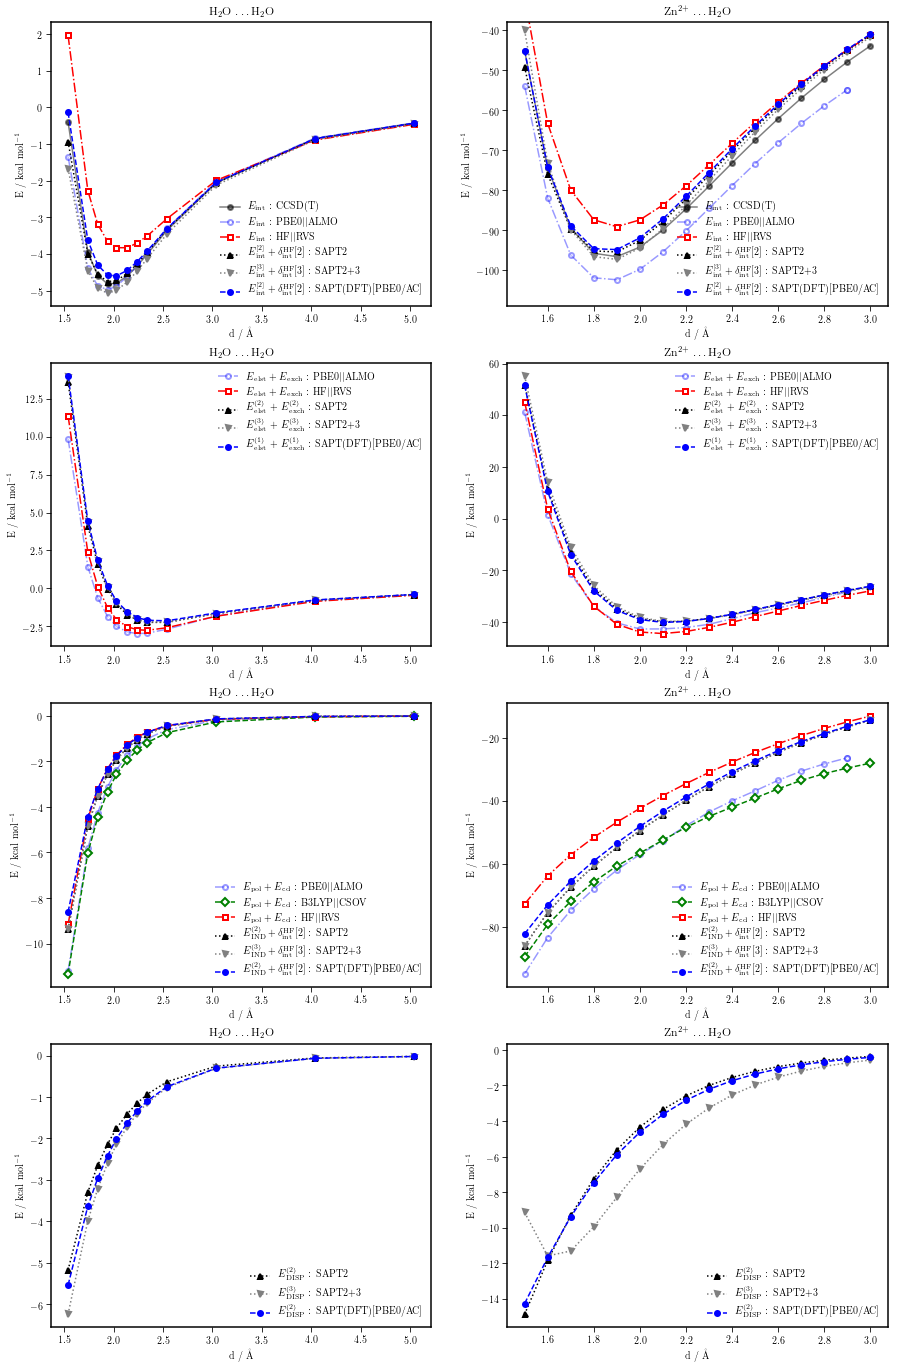

In [14]:
cc_alpha = 0.5 # Control the alpha value of the CCSD(T) curves to stop them from being intrusive
almo_alpha = 0.4
Xlabel = 'd / \u00c5'
Ylabel = 'E / kcal mol$^{-1}$'

#fig = plt.figure(figsize=(21,15)) # taille horizontale x verticale
fig, grph = plt.subplots(4, 2, figsize=(15,4*6))

##########
# H20..H2O
##########

##Eint##

grph[0, 0].plot(d['water2']['d'], cc_ref['water2']['Eint'],
          'k', linestyle='-', marker='o', alpha=cc_alpha,
          label=r'$E_{\mathrm{int}}$ : CCSD(T)')
grph[0, 0].plot(d['water2']['d'],almo['water2']['SCF-TOT'], 
                'b', linestyle='-.', marker='o',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{int}}$ : PBE0$||$ALMO')
grph[0, 0].plot(d['water2']['d'],rvs['water2']['Tot'], 
                'r', linestyle='-.', marker='s', markerfacecolor='white',
                label=r'$E\mathrm{_{int}}$ : HF$||$RVS')

grph[0, 0].plot(d['water2']['d'],sapt2['water2']['Tot'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{int}^{[2]}+\delta^{HF}_{int}[2]}$ : SAPT2')

grph[0, 0].plot(d['water2']['d'],sapt2p3['water2']['Tot'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{int}^{[3]}+\delta^{HF}_{int}[3]}$ : SAPT2+3')
grph[0, 0].plot(d['water2']['d'],saptdft_pbe0['water2']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{int}^{[2]}+\delta^{HF}_{int}[2]}$ : SAPT(DFT)[PBE0/AC]')


grph[0, 0].set_xlabel(Xlabel)
grph[0, 0].set_ylabel(Ylabel)
#grph[0, 0].set_xlim(1.4,3.1)
grph[0, 1].set_ylim(-5.3,+0.9)
grph[0, 0].legend(loc='lower right',frameon=False)
grph[0, 0].set_title('H$_{2}$O \dots H$_{2}$O')

##E_elst + E_exch ##

grph[1, 0].plot(d['water2']['d'],almo['water2']['FRZ'], 
                'b', linestyle='-.', marker='o',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{elst}} + E\mathrm{_{exch}}$ : PBE0$||$ALMO')
grph[1, 0].plot(d['water2']['d'],rvs['water2']['E1'], 
                'r', linestyle='-.', marker='s', markerfacecolor='white',
                label=r'$E\mathrm{_{elst}} + E\mathrm{_{exch}}$ : HF$||$RVS')
grph[1, 0].plot(d['water2']['d'],sapt2['water2']['Elec']+sapt2['water2']['Rep'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{elst}^{(2)}}$ + $E\mathrm{_{exch}^{(2)}}$ : SAPT2')
grph[1, 0].plot(d['water2']['d'],sapt2p3['water2']['Elec']+sapt2p3['water2']['Rep'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{elst}^{(3)}}$ + $E\mathrm{_{exch}^{(3)}}$ : SAPT2+3')
grph[1, 0].plot(d['water2']['d'],saptdft_pbe0['water2']['elst']+saptdft_pbe0['water2']['exch'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{elst}^{(1)}}$ + $E\mathrm{_{exch}^{(1)}}$ : SAPT(DFT)[PBE0/AC]')


grph[1, 0].set_xlabel(Xlabel)
grph[1, 0].set_ylabel(Ylabel)
#grph[1, 0].set_xlim(1.4,3.1)
#grph[1, 0].set_ylim(,)
grph[1, 0].legend(loc='upper right',frameon=False)
grph[1, 0].set_title('H$_{2}$O \dots H$_{2}$O')


## Induction : E_ct + E_pol &  ##

grph[2, 0].plot(d['water2']['d'],almo['water2']['POL']+almo['water2']['SCF-Ct1'],
                'b', linestyle='-.', marker='o',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{pol}} + E\mathrm{_{cd}}$ : PBE0$||$ALMO')
grph[2, 0].plot(d['water2']['d'],csov['water2']['Ind'], 
                'g', linestyle='--', marker='D', markerfacecolor='white',
                label=r'$E\mathrm{_{pol}} + E\mathrm{_{cd}}$ : B3LYP$||$CSOV')
grph[2, 0].plot(d['water2']['d'],rvs['water2']['E2'], 
                'r', linestyle='-.', marker='s', markerfacecolor='white',
                label=r'$E\mathrm{_{pol}} + E\mathrm{_{cd}}$ : HF$||$RVS')
grph[2, 0].plot(d['water2']['d'],sapt2['water2']['Ind'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{IND}^{(2)}+\delta^{HF}_{int}[2]}$ : SAPT2')
grph[2, 0].plot(d['water2']['d'],sapt2p3['water2']['Ind'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{IND}^{(3)}+\delta^{HF}_{int}[3]}$ : SAPT2+3')
grph[2, 0].plot(d['water2']['d'],saptdft_pbe0['water2']['IND'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{IND}^{(2)}+\delta^{HF}_{int}[2]}$ : SAPT(DFT)[PBE0/AC]')


grph[2, 0].set_xlabel(Xlabel)
grph[2, 0].set_ylabel(Ylabel)
#grph[2, 0].set_xlim(1.4,3.1)
#grph[2, 0].set_ylim(,)
grph[2, 0].legend(loc='lower right',frameon=False)
grph[2, 0].set_title('H$_{2}$O \dots H$_{2}$O')

## E_disp  ##
grph[3, 0].plot(d['water2']['d'],sapt2['water2']['Disp'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{DISP}^{(2)}}$ : SAPT2')
grph[3, 0].plot(d['water2']['d'],sapt2p3['water2']['Disp'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{DISP}^{(3)}}$ : SAPT2+3')
grph[3, 0].plot(d['water2']['d'],saptdft_pbe0['water2']['DISP'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{DISP}^{(2)}}$ : SAPT(DFT)[PBE0/AC]')


grph[3, 0].set_xlabel(Xlabel)
grph[3, 0].set_ylabel(Ylabel)
#grph[3, 0].set_xlim(1.4,3.1)
#grph[3, 0].set_ylim(,)
grph[3, 0].legend(loc='lower right',frameon=False)
grph[3, 0].set_title('H$_{2}$O \dots H$_{2}$O')

##########
# Zn..H2O
##########

##Eint##

grph[0, 1].plot(d['zn_h2o']['d'], cc_ref['zn_h2o']['Eint'],
          'k', linestyle='-', marker='o', alpha=cc_alpha,
          label=r'$E_{\mathrm{int}}$ : CCSD(T)')
grph[0, 1].plot(almo['zn_h2o']['d'],almo['zn_h2o']['SCF-TOT'], 
                'b', linestyle='-.', marker='o',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{int}}$ : PBE0$||$ALMO')
grph[0, 1].plot(d['zn_h2o']['d'],rvs['zn_h2o']['Tot'], 
                'r', linestyle='-.', marker='s', markerfacecolor='white',
                label=r'$E\mathrm{_{int}}$ : HF$||$RVS')

grph[0, 1].plot(d['zn_h2o']['d'],sapt2['zn_h2o']['Tot'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{int}^{[2]}+\delta^{HF}_{int}[2]}$ : SAPT2')

grph[0, 1].plot(d['zn_h2o']['d'],sapt2p3['zn_h2o']['Tot'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{int}^{[3]}+\delta^{HF}_{int}[3]}$ : SAPT2+3')
grph[0, 1].plot(d['zn_h2o']['d'],saptdft_pbe0['zn_h2o']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{int}^{[2]}+\delta^{HF}_{int}[2]}$ : SAPT(DFT)[PBE0/AC]')


grph[0, 1].set_xlabel(Xlabel)
grph[0, 1].set_ylabel(Ylabel)
#grph[0, 1].set_xlim(1.5,4.0)
grph[0, 1].set_ylim(-109.0,-38.0)
grph[0, 1].legend(loc='best',frameon=False)
grph[0, 1].set_title('Zn$^{2+}$ \dots H$_{2}$O')

##E_elst + E_exch ##

grph[1, 1].plot(almo['zn_h2o']['d'],almo['zn_h2o']['FRZ'], 
                'b', linestyle='-.', marker='o',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{elst}} + E\mathrm{_{exch}}$ : PBE0$||$ALMO')
grph[1, 1].plot(d['zn_h2o']['d'],rvs['zn_h2o']['E1'], 
                'r', linestyle='-.', marker='s', markerfacecolor='white',
                label=r'$E\mathrm{_{elst}} + E\mathrm{_{exch}}$ : HF$||$RVS')
grph[1, 1].plot(d['zn_h2o']['d'],sapt2['zn_h2o']['Elec']+sapt2['zn_h2o']['Rep'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{elst}^{(2)}}$ + $E\mathrm{_{exch}^{(2)}}$ : SAPT2')
grph[1, 1].plot(d['zn_h2o']['d'],sapt2p3['zn_h2o']['Elec']+sapt2p3['zn_h2o']['Rep'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{elst}^{(3)}}$ + $E\mathrm{_{exch}^{(3)}}$ : SAPT2+3')
grph[1, 1].plot(d['zn_h2o']['d'],saptdft_pbe0['zn_h2o']['elst']+saptdft_pbe0['zn_h2o']['exch'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{elst}^{(1)}}$ + $E\mathrm{_{exch}^{(1)}}$ : SAPT(DFT)[PBE0/AC]')


grph[1, 1].set_xlabel(Xlabel)
grph[1, 1].set_ylabel(Ylabel)
#grph[1, 1].set_xlim(1.4,3.1)
#grph[1, 1].set_ylim(,)
grph[1, 1].legend(loc='upper right',frameon=False)
grph[1, 1].set_title('Zn$^{2+}$ \dots H$_{2}$O')

## Induction : E_ct + E_pol &  ##

grph[2, 1].plot(almo['zn_h2o']['d'],almo['zn_h2o']['POL']+almo['zn_h2o']['SCF-Ct1'],
                'b', linestyle='-.', marker='o',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{pol}} + E\mathrm{_{cd}}$ : PBE0$||$ALMO')
grph[2, 1].plot(d['zn_h2o']['d'],csov['zn_h2o']['Ind'], 
                'g', linestyle='--', marker='D', markerfacecolor='white',
                label=r'$E\mathrm{_{pol}} + E\mathrm{_{cd}}$ : B3LYP$||$CSOV')
grph[2, 1].plot(d['zn_h2o']['d'],rvs['zn_h2o']['E2'], 
                'r', linestyle='-.', marker='s', markerfacecolor='white',
                label=r'$E\mathrm{_{pol}} + E\mathrm{_{cd}}$ : HF$||$RVS')
grph[2, 1].plot(d['zn_h2o']['d'],sapt2['zn_h2o']['Ind'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{IND}^{(2)}+\delta^{HF}_{int}[2]}$ : SAPT2')
grph[2, 1].plot(d['zn_h2o']['d'],sapt2p3['zn_h2o']['Ind'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{IND}^{(3)}+\delta^{HF}_{int}[3]}$ : SAPT2+3')
grph[2, 1].plot(d['zn_h2o']['d'],saptdft_pbe0['zn_h2o']['IND'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{IND}^{(2)}+\delta^{HF}_{int}[2]}$ : SAPT(DFT)[PBE0/AC]')


grph[2, 1].set_xlabel(Xlabel)
grph[2, 1].set_ylabel(Ylabel)
#grph[2, 1].set_xlim(1.4,3.1)
#grph[2, 1].set_ylim(,)
grph[2, 1].legend(loc='lower right',frameon=False)
grph[2, 1].set_title('Zn$^{2+}$ \dots H$_{2}$O')

## E_disp  ##
grph[3, 1].plot(d['zn_h2o']['d'],sapt2['zn_h2o']['Disp'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{DISP}^{(2)}}$ : SAPT2')
grph[3, 1].plot(d['zn_h2o']['d'],sapt2p3['zn_h2o']['Disp'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{DISP}^{(3)}}$ : SAPT2+3')
grph[3, 1].plot(d['zn_h2o']['d'],saptdft_pbe0['zn_h2o']['DISP'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{DISP}^{(2)}}$ : SAPT(DFT)[PBE0/AC]')


grph[3, 1].set_xlabel(Xlabel)
grph[3, 1].set_ylabel(Ylabel)
#grph[3, 1].set_xlim(1.4,3.1)
#grph[3, 1].set_ylim(,)
grph[3, 1].legend(loc='lower right',frameon=False)
grph[3, 1].set_title('Zn$^{2+}$ \dots H$_{2}$O')

In [15]:
fig.savefig('Comparison_of_SAPT_SAPTDFT_and_EDAs.pdf')

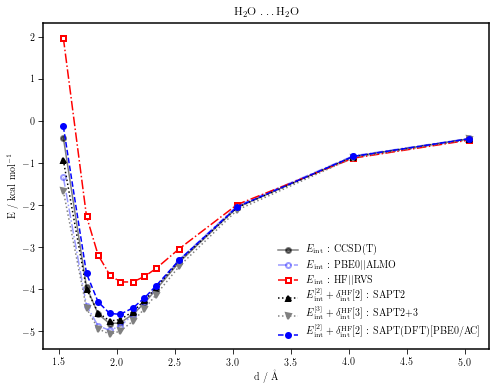

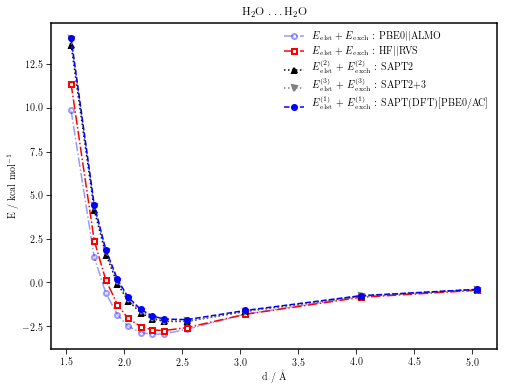

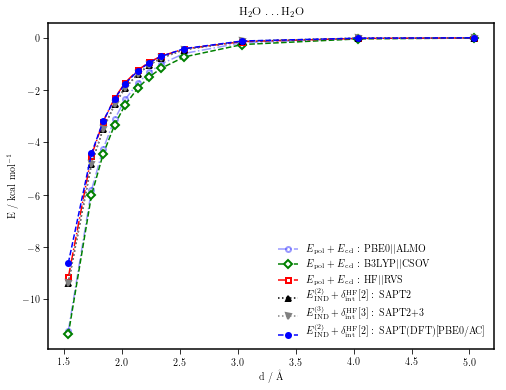

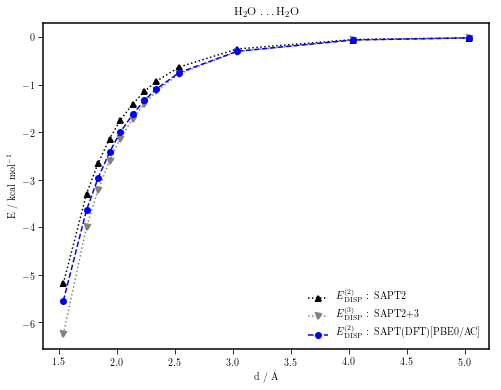

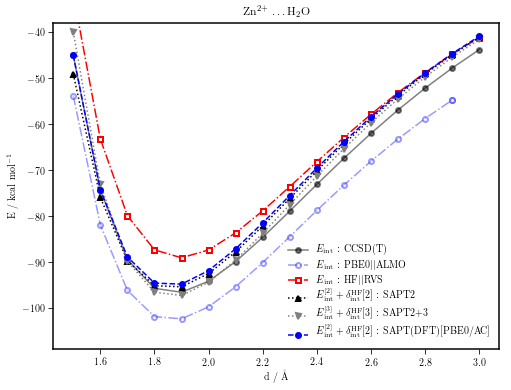

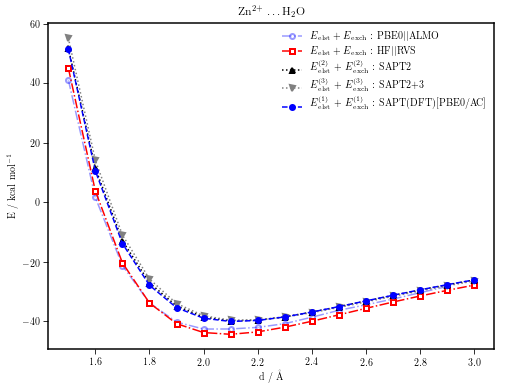

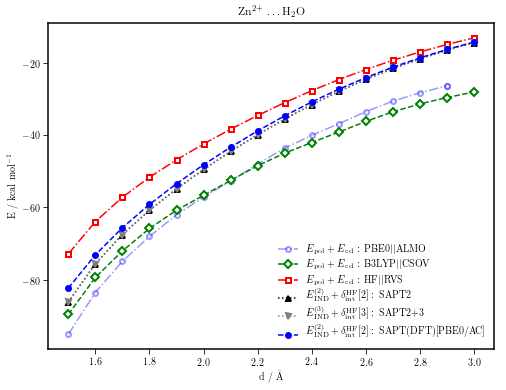

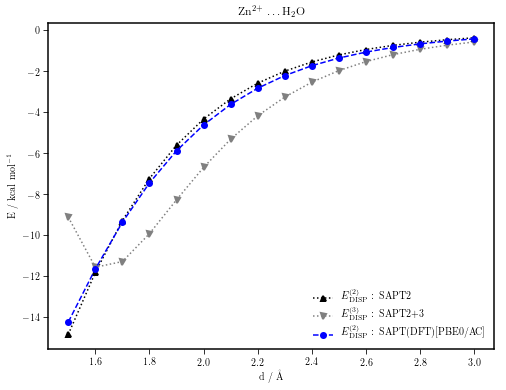

In [28]:
cc_alpha = 0.5 # Control the alpha value of the CCSD(T) curves to stop them from being intrusive
almo_alpha = 0.4
Xlabel = 'd / \u00c5'
Ylabel = 'E / kcal mol$^{-1}$'

#fig = plt.figure(figsize=(21,15)) # taille horizontale x verticale
#fig, grph = plt.subplots(4, 2, figsize=(15,4*6))

##########
# H20..H2O
##########

##Eint##
fig1 = plt.figure(figsize=(8,6))
grph1 = fig1.add_subplot(111)

grph1.plot(d['water2']['d'], cc_ref['water2']['Eint'],
          'k', linestyle='-', marker='o', alpha=cc_alpha,
          label=r'$E_{\mathrm{int}}$ : CCSD(T)')
grph1.plot(d['water2']['d'],almo['water2']['SCF-TOT'], 
                'b', linestyle='-.', marker='o',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{int}}$ : PBE0$||$ALMO')
grph1.plot(d['water2']['d'],rvs['water2']['Tot'], 
                'r', linestyle='-.', marker='s', markerfacecolor='white',
                label=r'$E\mathrm{_{int}}$ : HF$||$RVS')

grph1.plot(d['water2']['d'],sapt2['water2']['Tot'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{int}^{[2]}+\delta^{HF}_{int}[2]}$ : SAPT2')

grph1.plot(d['water2']['d'],sapt2p3['water2']['Tot'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{int}^{[3]}+\delta^{HF}_{int}[3]}$ : SAPT2+3')
grph1.plot(d['water2']['d'],saptdft_pbe0['water2']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{int}^{[2]}+\delta^{HF}_{int}[2]}$ : SAPT(DFT)[PBE0/AC]')


grph1.set_xlabel(Xlabel)
grph1.set_ylabel(Ylabel)
#grph1.set_xlim(1.4,3.1)
#grph1.set_ylim(-5.3,+0.9)
grph1.legend(loc='lower right',frameon=False)
grph1.set_title('H$_{2}$O \dots H$_{2}$O')
fig1.savefig('water_tot_sepa.eps')

##E_elst + E_exch ##

fig2 = plt.figure(figsize=(8,6))
grph2 = fig2.add_subplot(111)
grph2.plot(d['water2']['d'],almo['water2']['FRZ'], 
                'b', linestyle='-.', marker='o',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{elst}} + E\mathrm{_{exch}}$ : PBE0$||$ALMO')
grph2.plot(d['water2']['d'],rvs['water2']['E1'], 
                'r', linestyle='-.', marker='s', markerfacecolor='white',
                label=r'$E\mathrm{_{elst}} + E\mathrm{_{exch}}$ : HF$||$RVS')
grph2.plot(d['water2']['d'],sapt2['water2']['Elec']+sapt2['water2']['Rep'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{elst}^{(2)}}$ + $E\mathrm{_{exch}^{(2)}}$ : SAPT2')
grph2.plot(d['water2']['d'],sapt2p3['water2']['Elec']+sapt2p3['water2']['Rep'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{elst}^{(3)}}$ + $E\mathrm{_{exch}^{(3)}}$ : SAPT2+3')
grph2.plot(d['water2']['d'],saptdft_pbe0['water2']['elst']+saptdft_pbe0['water2']['exch'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{elst}^{(1)}}$ + $E\mathrm{_{exch}^{(1)}}$ : SAPT(DFT)[PBE0/AC]')


grph2.set_xlabel(Xlabel)
grph2.set_ylabel(Ylabel)
#grph2.set_xlim(1.4,3.1)
#grph2.set_ylim(,)
grph2.legend(loc='upper right',frameon=False)
grph2.set_title('H$_{2}$O \dots H$_{2}$O')
fig2.savefig('water_e1_sepa.eps')


## Induction : E_ct + E_pol &  ##

fig3 = plt.figure(figsize=(8,6))
grph3 = fig3.add_subplot(111)
grph3.plot(d['water2']['d'],almo['water2']['POL']+almo['water2']['SCF-Ct1'],
                'b', linestyle='-.', marker='o',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{pol}} + E\mathrm{_{cd}}$ : PBE0$||$ALMO')
grph3.plot(d['water2']['d'],csov['water2']['Ind'], 
                'g', linestyle='--', marker='D', markerfacecolor='white',
                label=r'$E\mathrm{_{pol}} + E\mathrm{_{cd}}$ : B3LYP$||$CSOV')
grph3.plot(d['water2']['d'],rvs['water2']['E2'], 
                'r', linestyle='-.', marker='s', markerfacecolor='white',
                label=r'$E\mathrm{_{pol}} + E\mathrm{_{cd}}$ : HF$||$RVS')
grph3.plot(d['water2']['d'],sapt2['water2']['Ind'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{IND}^{(2)}+\delta^{HF}_{int}[2]}$ : SAPT2')
grph3.plot(d['water2']['d'],sapt2p3['water2']['Ind'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{IND}^{(3)}+\delta^{HF}_{int}[3]}$ : SAPT2+3')
grph3.plot(d['water2']['d'],saptdft_pbe0['water2']['IND'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{IND}^{(2)}+\delta^{HF}_{int}[2]}$ : SAPT(DFT)[PBE0/AC]')


grph3.set_xlabel(Xlabel)
grph3.set_ylabel(Ylabel)
#grph3.set_xlim(1.4,3.1)
#grph3.set_ylim(,)
grph3.legend(loc='lower right',frameon=False)
grph3.set_title('H$_{2}$O \dots H$_{2}$O')
fig3.savefig('water_e2_sepa.eps')

## E_disp  ##
fig4 = plt.figure(figsize=(8,6))
grph4 = fig4.add_subplot(111)
grph4.plot(d['water2']['d'],sapt2['water2']['Disp'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{DISP}^{(2)}}$ : SAPT2')
grph4.plot(d['water2']['d'],sapt2p3['water2']['Disp'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{DISP}^{(3)}}$ : SAPT2+3')
grph4.plot(d['water2']['d'],saptdft_pbe0['water2']['DISP'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{DISP}^{(2)}}$ : SAPT(DFT)[PBE0/AC]')


grph4.set_xlabel(Xlabel)
grph4.set_ylabel(Ylabel)
#grph4.set_xlim(1.4,3.1)
#grph4.set_ylim(,)
grph4.legend(loc='lower right',frameon=False)
grph4.set_title('H$_{2}$O \dots H$_{2}$O')
fig4.savefig('water_disp_sepa.eps')

##########
# Zn..H2O
##########

##Eint##
fig5 = plt.figure(figsize=(8,6))
grph5 = fig5.add_subplot(111)

grph5.plot(d['zn_h2o']['d'], cc_ref['zn_h2o']['Eint'],
          'k', linestyle='-', marker='o', alpha=cc_alpha,
          label=r'$E_{\mathrm{int}}$ : CCSD(T)')
grph5.plot(almo['zn_h2o']['d'],almo['zn_h2o']['SCF-TOT'], 
                'b', linestyle='-.', marker='o',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{int}}$ : PBE0$||$ALMO')
grph5.plot(d['zn_h2o']['d'],rvs['zn_h2o']['Tot'], 
                'r', linestyle='-.', marker='s', markerfacecolor='white',
                label=r'$E\mathrm{_{int}}$ : HF$||$RVS')

grph5.plot(d['zn_h2o']['d'],sapt2['zn_h2o']['Tot'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{int}^{[2]}+\delta^{HF}_{int}[2]}$ : SAPT2')

grph5.plot(d['zn_h2o']['d'],sapt2p3['zn_h2o']['Tot'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{int}^{[3]}+\delta^{HF}_{int}[3]}$ : SAPT2+3')
grph5.plot(d['zn_h2o']['d'],saptdft_pbe0['zn_h2o']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{int}^{[2]}+\delta^{HF}_{int}[2]}$ : SAPT(DFT)[PBE0/AC]')


grph5.set_xlabel(Xlabel)
grph5.set_ylabel(Ylabel)
#grph5.set_xlim(1.5,4.0)
grph5.set_ylim(-109.0,-38.0)
grph5.legend(loc='best',frameon=False)
grph5.set_title('Zn$^{2+}$ \dots H$_{2}$O')
fig5.savefig('zn_tot_sepa.eps')

##E_elst + E_exch ##
fig6 = plt.figure(figsize=(8,6))
grph6 = fig6.add_subplot(111)
grph6.plot(almo['zn_h2o']['d'],almo['zn_h2o']['FRZ'], 
                'b', linestyle='-.', marker='o',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{elst}} + E\mathrm{_{exch}}$ : PBE0$||$ALMO')
grph6.plot(d['zn_h2o']['d'],rvs['zn_h2o']['E1'], 
                'r', linestyle='-.', marker='s', markerfacecolor='white',
                label=r'$E\mathrm{_{elst}} + E\mathrm{_{exch}}$ : HF$||$RVS')
grph6.plot(d['zn_h2o']['d'],sapt2['zn_h2o']['Elec']+sapt2['zn_h2o']['Rep'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{elst}^{(2)}}$ + $E\mathrm{_{exch}^{(2)}}$ : SAPT2')
grph6.plot(d['zn_h2o']['d'],sapt2p3['zn_h2o']['Elec']+sapt2p3['zn_h2o']['Rep'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{elst}^{(3)}}$ + $E\mathrm{_{exch}^{(3)}}$ : SAPT2+3')
grph6.plot(d['zn_h2o']['d'],saptdft_pbe0['zn_h2o']['elst']+saptdft_pbe0['zn_h2o']['exch'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{elst}^{(1)}}$ + $E\mathrm{_{exch}^{(1)}}$ : SAPT(DFT)[PBE0/AC]')


grph6.set_xlabel(Xlabel)
grph6.set_ylabel(Ylabel)
#grph6.set_xlim(1.4,3.1)
#grph6.set_ylim(,)
grph6.legend(loc='upper right',frameon=False)
grph6.set_title('Zn$^{2+}$ \dots H$_{2}$O')
fig6.savefig('zn_e1_sepa.eps')

## Induction : E_ct + E_pol &  ##
fig7 = plt.figure(figsize=(8,6))
grph7 = fig7.add_subplot(111)
grph7.plot(almo['zn_h2o']['d'],almo['zn_h2o']['POL']+almo['zn_h2o']['SCF-Ct1'],
                'b', linestyle='-.', marker='o',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{pol}} + E\mathrm{_{cd}}$ : PBE0$||$ALMO')
grph7.plot(d['zn_h2o']['d'],csov['zn_h2o']['Ind'], 
                'g', linestyle='--', marker='D', markerfacecolor='white',
                label=r'$E\mathrm{_{pol}} + E\mathrm{_{cd}}$ : B3LYP$||$CSOV')
grph7.plot(d['zn_h2o']['d'],rvs['zn_h2o']['E2'], 
                'r', linestyle='-.', marker='s', markerfacecolor='white',
                label=r'$E\mathrm{_{pol}} + E\mathrm{_{cd}}$ : HF$||$RVS')
grph7.plot(d['zn_h2o']['d'],sapt2['zn_h2o']['Ind'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{IND}^{(2)}+\delta^{HF}_{int}[2]}$ : SAPT2')
grph7.plot(d['zn_h2o']['d'],sapt2p3['zn_h2o']['Ind'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{IND}^{(3)}+\delta^{HF}_{int}[3]}$ : SAPT2+3')
grph7.plot(d['zn_h2o']['d'],saptdft_pbe0['zn_h2o']['IND'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{IND}^{(2)}+\delta^{HF}_{int}[2]}$ : SAPT(DFT)[PBE0/AC]')


grph7.set_xlabel(Xlabel)
grph7.set_ylabel(Ylabel)
#grph7.set_xlim(1.4,3.1)
#grph7.set_ylim(,)
grph7.legend(loc='lower right',frameon=False)
grph7.set_title('Zn$^{2+}$ \dots H$_{2}$O')
fig7.savefig('zn_e2_sepa.eps')

## E_disp  ##
fig8 = plt.figure(figsize=(8,6))
grph8 = fig8.add_subplot(111)
grph8.plot(d['zn_h2o']['d'],sapt2['zn_h2o']['Disp'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{DISP}^{(2)}}$ : SAPT2')
grph8.plot(d['zn_h2o']['d'],sapt2p3['zn_h2o']['Disp'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{DISP}^{(3)}}$ : SAPT2+3')
grph8.plot(d['zn_h2o']['d'],saptdft_pbe0['zn_h2o']['DISP'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{DISP}^{(2)}}$ : SAPT(DFT)[PBE0/AC]')


grph8.set_xlabel(Xlabel)
grph8.set_ylabel(Ylabel)
#grph8.set_xlim(1.4,3.1)
#grph8.set_ylim(,)
grph8.legend(loc='lower right',frameon=False)
grph8.set_title('Zn$^{2+}$ \dots H$_{2}$O')
fig8.savefig('zn_disp_sepa.eps')